What factors affect how much customers will pay for netflix ?

fixing error 2, no file or directory found. the reasopn this occurs is to find the current working directory of the python file youre working on. The main way to fix this is to find the cwd (current working directory) of the file, then fixing the file path from that

1. fixing the error [2] in directory

In [3]:
final_path = '/workspaces/Netflix-churn-analysis/netflix_customer_churn.csv'
open(final_path)


<_io.TextIOWrapper name='/workspaces/Netflix-churn-analysis/netflix_customer_churn.csv' mode='r' encoding='UTF-8'>

In [4]:
%pip install pandas, seaborn, numpy, matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
ERROR: Invalid requirement: 'pandas,': Expected end or semicolon (after name and no valid version specifier)
    pandas,
          ^
Note: you may need to restart the kernel to use updated packages.


2. importing libraries neccesary

In [5]:
#importing the libraries
import pandas as pd #used for data manipulation
import seaborn as sns # used as an addin for matplotlib for heastmaps and other interesting paths
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
 #Vizualisation (Matplotlib, Plotly, Seaborn, etc. )



In [6]:
plt.style.use('ggplot') #plot style
from matplotlib.pyplot import figure

#read in data-include r infront of the filepath to make python think of the string literally

# df.read_csv produces an error as we havent used the pandas module to read the data

df = pd.read_csv('/workspaces/Netflix-churn-analysis/netflix_customer_churn.csv') # for first attempt read on how to use pandas

2. Messing around with pandas

In [7]:
df.head() #gives the first 5 rows if no argumenbt is given, but an argument n = 7 prints the seven rows
df.tail() #gives the last 5 rows 
sorted_data_age = df.sort_values(by='watch_hours', ascending = False)  #sorts by most watching hours
sub_type = df['subscription_type']
#print(sub_type.head()) #only prints subscription type column
#sorting by only columns you want
watch_hours_sub_type = df[['watch_hours','monthly_fee' ]]
print(watch_hours_sub_type)

#now lets sort them by ascending watch hours
watch_hours_sub_type_ascendingwtch = watch_hours_sub_type.sort_values('watch_hours', ascending = True)
#print(watch_hours_sub_type_ascendingwtch.tail())
#no insights are found, the same methods can be found using tail()
#to derive some spread, we can use describe.(percentiles = , include = , exclude = )
#print(df.describe())
#finding specific percentiles 
percentile = [0.2, 0.5, 0.7, 0.99] #stores the needed percentiles 
#print(df.describe(percentiles = percentile))

      watch_hours  monthly_fee
0           14.73         8.99
1            0.70        13.99
2           16.32        13.99
3            4.51        17.99
4            1.89        13.99
...           ...          ...
4995        49.17         8.99
4996         9.24         8.99
4997        16.55        13.99
4998         9.12         8.99
4999         1.62         8.99

[5000 rows x 2 columns]


In [8]:
#here we can see the dataframe to inspect any n/a values
df.isna().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

3. Data cleaning 

In [9]:
# to see missing data
for i in df.columns:
    pct_missing = np.mean(df[i].isnull())
    print(f'{i}-{pct_missing}') #answer in f string since i parses through the columns

customer_id-0.0
age-0.0
gender-0.0
subscription_type-0.0
watch_hours-0.0
last_login_days-0.0
region-0.0
device-0.0
monthly_fee-0.0
churned-0.0
payment_method-0.0
number_of_profiles-0.0
avg_watch_time_per_day-0.0
favorite_genre-0.0


In [10]:
#checking data types. nKeep this for future reference
df.describe()


,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [11]:
age_df = df.sort_values(by = ['age'], ascending = True)
age_df.head(n=20) #sorted by ascending order of age

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4908,de3fea5a-0bac-47ec-8304-83c1f89f049e,18,Female,Standard,13.02,6,Africa,Desktop,13.99,0,Crypto,5,1.86,Documentary
4500,e623d359-0278-4bfc-82c3-86892eed77a3,18,Male,Standard,3.49,54,Oceania,Laptop,13.99,1,Crypto,3,0.06,Sci-Fi
551,d700d121-5896-4474-915e-9c163bdf9c32,18,Male,Standard,7.40,18,North America,Mobile,13.99,0,Credit Card,2,0.39,Romance
2180,2723dca3-d1e9-4198-829f-f9ed1fb396b4,18,Male,Premium,28.08,11,Oceania,Laptop,17.99,0,Gift Card,2,2.34,Romance
2196,6afbc377-c531-4b4b-ba2d-f616107bea3e,18,Other,Premium,25.30,51,North America,TV,17.99,0,Crypto,3,0.49,Horror
2198,9d8871fd-6726-4bdd-b846-4a19c7d197bc,18,Male,Standard,1.68,19,South America,Laptop,13.99,1,Crypto,4,0.08,Sci-Fi
4457,54372fef-6fb6-421f-bab6-606fb3a90f0c,18,Male,Standard,20.23,36,Europe,Mobile,13.99,0,Credit Card,4,0.55,Romance
4474,334fbf6b-0681-49de-ae3a-c08da907fda0,18,Female,Basic,3.19,16,North America,Laptop,8.99,1,Gift Card,4,0.19,Action
4961,a8725398-953d-4250-af9d-f99ecb96b562,18,Other,Premium,46.06,57,Asia,Tablet,17.99,0,Crypto,4,0.79,Comedy
199,533ad58f-7675-4e1f-8a7b-27f64e6ac546,18,Other,Premium,17.75,9,Oceania,Desktop,17.99,0,Gift Card,1,1.77,Comedy


In [12]:
#Age will have a hiher correlation, watch time maybe as well, maybe monthly_fee

stopped at churn analysis, searhc medium for blogs

In [13]:
#encoding gender, subscription type, payment_method, favorite_genre, and any other categorical variables
df_gender_encoded = LabelEncoder().fit_transform(df.gender.values)#encodes gender by using scikit learn through using the attribute fit_transform 0=female, 1 = male, 2 = other
df['gender_encoded']=df_gender_encoded #THe column gender_encoded is added

df_subscription_encoded = LabelEncoder().fit_transform(df.subscription_type.values) #0 = basic, standard = 2, 1 = premium
df['subscription_encoded'] = df_subscription_encoded #does the same thing as gender encoded

df_payment_encoded = LabelEncoder().fit_transform(df.payment_method.values)# 3 = giftcard, 1= crypto, 2 = debit card,  4 = paypal
df['payment_meth_encoded']=df_payment_encoded

df_favgenre_encoded = LabelEncoder().fit_transform(df.favorite_genre)
df['favgenre_encoded']=df_favgenre_encoded


df_region_encoded = LabelEncoder().fit_transform(df.region)
df['region_encoded'] = df_region_encoded

df_device_encoded= LabelEncoder().fit_transform(df.device)
df['device_encoded'] = df_device_encoded

df_payments_encoded = LabelEncoder().fit_transform(df.monthly_fee)
df['fee_encoded'] = df_device_encoded

df


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,...,number_of_profiles,avg_watch_time_per_day,favorite_genre,gender_encoded,subscription_encoded,payment_meth_encoded,favgenre_encoded,region_encoded,device_encoded,fee_encoded
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,...,1,0.49,Action,2,0,3,0,0,3,3
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,...,5,0.03,Sci-Fi,2,2,3,6,2,2,2
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,...,2,1.48,Drama,0,2,1,3,1,3,3
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,...,2,0.35,Horror,2,1,1,4,4,3,3
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,...,2,0.13,Action,2,2,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,...,4,4.10,Drama,0,0,0,3,2,0,0
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,...,3,3.08,Documentary,0,0,4,2,3,0,0
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,...,2,0.33,Action,1,2,2,0,5,0,0
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,...,4,2.28,Sci-Fi,0,0,0,6,2,1,1


In [14]:
#stopped at encoding, now for future reference lets see how the categorical data was encoded


Text(0.5, 1.0, 'churn as a percentage')

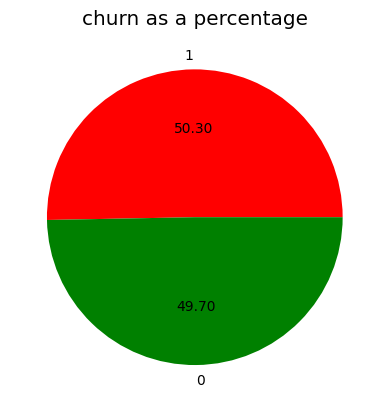

In [15]:
#data visualization. This part helps us identify any patterns, gain inasights and help us communicate
# information effectively
# 1st visualization is churn as a percentage of customers

churn_labels = df['churned'].value_counts().keys().tolist()
churn_values = df['churned'].value_counts().values.tolist()
plot_data = plt.pie(churn_values, labels=churn_labels, autopct = '%.2f', colors = ['red', 'green'])
plt.title( 'churn as a percentage')
#nothign to notice in churn as a percentage, chrun is equal showing definitive room for improvement

<Axes: xlabel='churned', ylabel='count'>

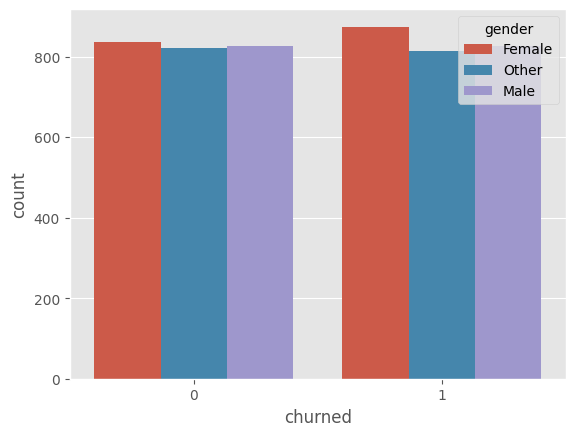

In [16]:
sns.countplot(x = 'churned', data = df, hue = 'gender' )


In [17]:
#females take up most of the customer base, but the linkeliness of churn by gender needs further EDA

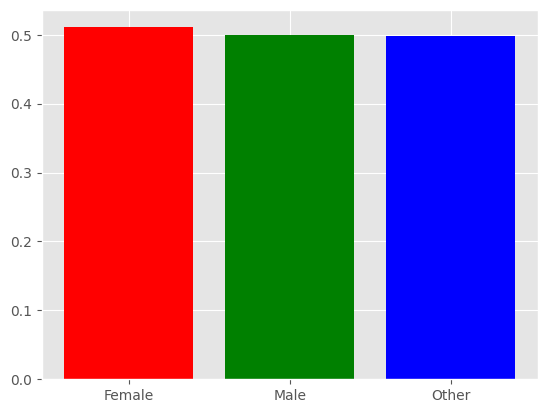

In [18]:
#lets visualize churn by gender
plot_by_gender = df.groupby('gender')['churned'].mean().reset_index()
plt.bar(plot_by_gender['gender'], plot_by_gender['churned'], color = ['red', 'green', 'blue'])
plt.show()

In [19]:
#therefore females are likely to churn, but this may be due to the fact that they are the majority of the customer base, so we need to look at the churn rate as this becomes a critical business risk
# as they are more at risk of churning, which poses a hgiher threat to the subscriptiuons revenue. #stopped at churn by tech support

/tmp/ipykernel_2157/1521109121.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  watch_hours_churn = df.groupby('watch_hours')['churned'].mean().reset_index()


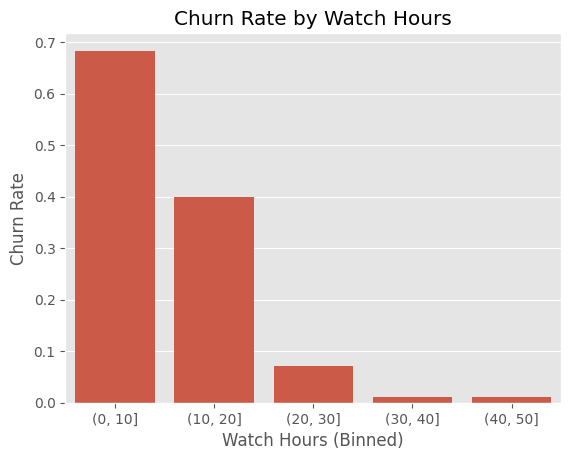

In [20]:
#visualizing churn by wathc hours
df['watch_hours'] = pd.cut(df['watch_hours'], bins=[0, 10, 20, 30, 40, 50])

# Group by watch_hour bins and calculate mean churn
watch_hours_churn = df.groupby('watch_hours')['churned'].mean().reset_index()

# Plot
sns.barplot(x='watch_hours', y='churned', data=watch_hours_churn)
plt.ylabel('Churn Rate')
plt.xlabel('Watch Hours (Binned)')
plt.title('Churn Rate by Watch Hours')
plt.show()


**as we can see**
less watch hours cause churn by a large amount, this means the content has to be more engaging


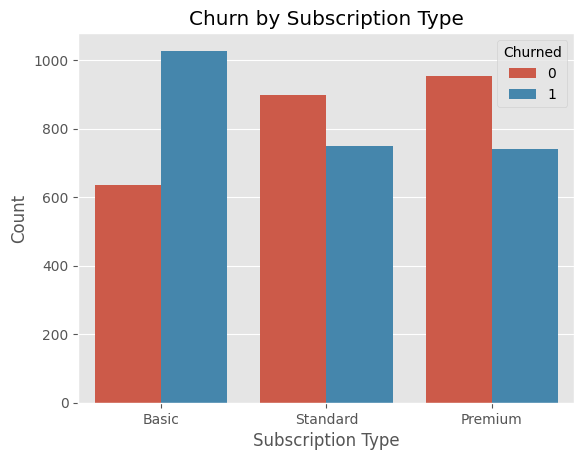

In [21]:
#churn by subscription type
sns.countplot(x='subscription_type', hue='churned', data=df)
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churned', loc='upper right')
plt.show()

In [22]:
#this shows that the basic subscription type has the highest churn rate, which is expected as it has the least amount of content and features, so it is more likely to churn
#this is a critical business risk as the basic subscription type is the most affordable, so it is more likely to be used by customers who are more price sensitive, so they are more likely to churn if they feel they are not getting value for money


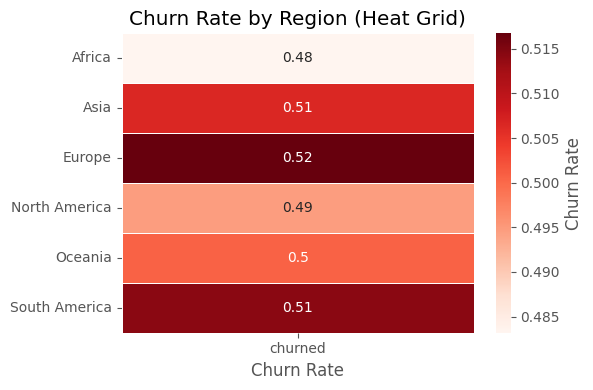

In [23]:
churn_by_region = df.groupby('region')['churned'].mean().reset_index()

# Convert to pivot table format for heatmap (1 row, many columns)
heat_data = churn_by_region.pivot_table(index='region', values='churned')

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(heat_data, annot=True, cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate by Region (Heat Grid)')
plt.ylabel('')
plt.xlabel('Churn Rate')
plt.tight_layout()
plt.show()

# europe is most likely to churn

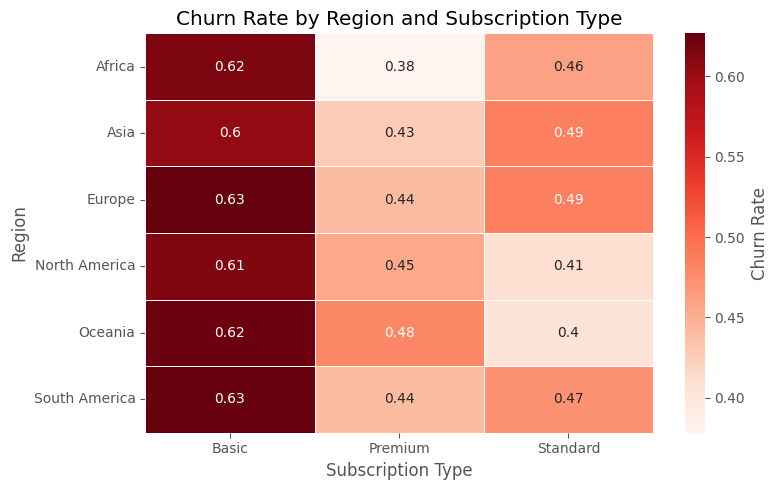

In [24]:
heat_data = df.pivot_table(index='region', columns='subscription_type', values='churned', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate by Region and Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


# across the region board, basic subscription members are way mroe likely to churn. This suggests possible improvement in user ability for basic subscription model, or maybe reducing the price of the basic subscription so consumers make it mroe rational to buy the basic subscription. THis supports our earlier findings of basic subscription members being more likely to churn 

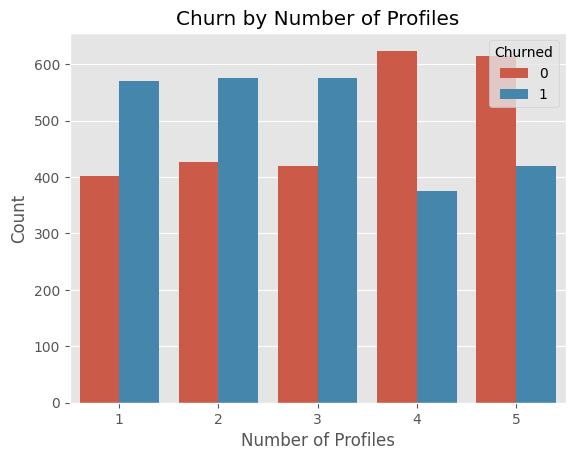

In [25]:
#churn by number of profiles, this likely indicates family plans, which are more likely to churn as they have more people using the service, so if one person is not happy with the service, they are more likely to churn
sns.countplot(x='number_of_profiles', hue='churned', data=df)
plt.title('Churn by Number of Profiles')
plt.xlabel('Number of Profiles')
plt.ylabel('Count')
plt.legend(title='Churned', loc='upper right')
plt.show()  


In [26]:
churn_by_last_login = df.groupby('last_login_days')['churned'].mean().reset_index()
churn_by_last_login_bins = pd.cut(churn_by_last_login['last_login_days'], bins=[0, 30, 60, 90, 120, 150])



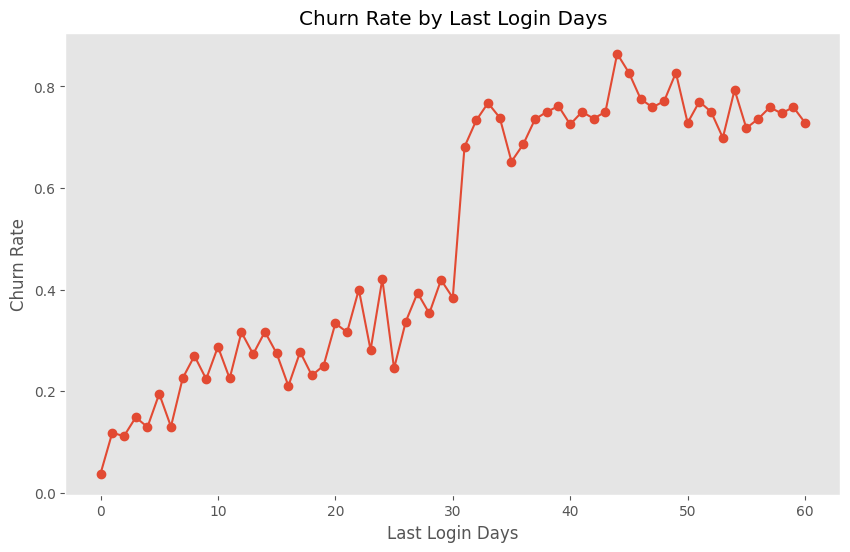

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(churn_by_last_login['last_login_days'], churn_by_last_login['churned'], marker='o')
plt.title('Churn Rate by Last Login Days')
plt.xlabel('Last Login Days')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()


In [ ]:
#As concluded, the last login days has a high correlation with churn, as the more days a customer has not logged in, the more likely they are to churn.
#But we are seeing a large jump from 30 days onwards, which suggests that if customers do not log in for more than 30 days, they are more likely to churn.


,last_login_days,churned
0,0,0.037037
1,1,0.117647
2,2,0.111111
3,3,0.148148
4,4,0.129032
...,...,...
56,56,0.736111
57,57,0.759036
58,58,0.746988
59,59,0.759494


/tmp/ipykernel_2157/2304718153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='favorite_genre', y='churned', data=churn_by_genre, palette='viridis')


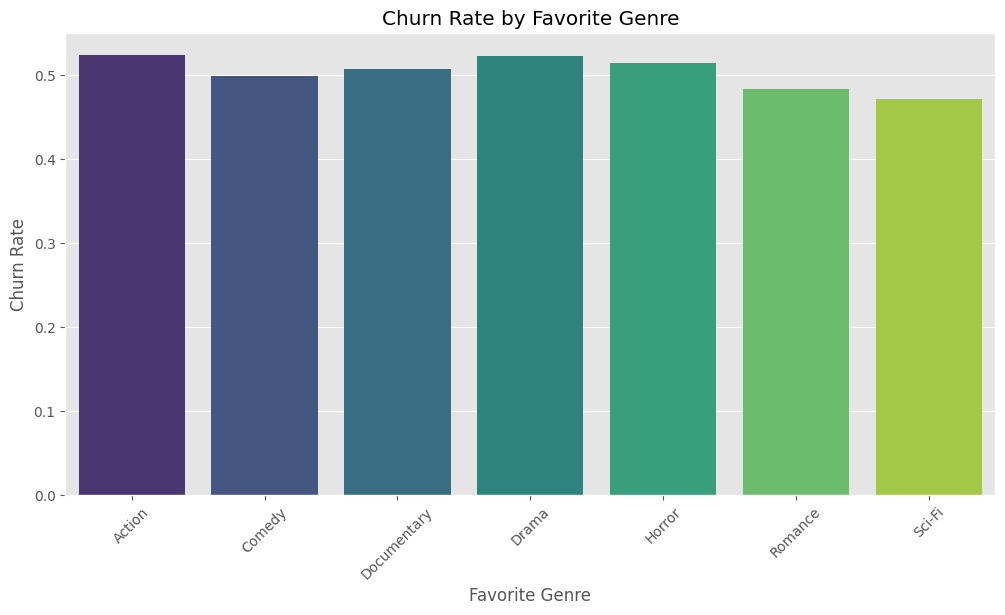

In [33]:
churn_by_genre = df.groupby('favorite_genre')['churned'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='favorite_genre', y='churned', data=churn_by_genre, palette='viridis')
plt.title('Churn Rate by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Churn b y favorite genre is inconclusive, as there is no clear pattern, but it is interesting to note that the genre with the highest churn rate is horror, which may suggest that customers who prefer horror movies are more likely to churn.
#This may be due to the fact that horror movies are more niche, so there is less content available, so customers may be more likely to churn if they feel they are not getting value for money.


,favorite_genre,churned
0,Action,0.523673
1,Comedy,0.499270
2,Documentary,0.507545
3,Drama,0.522572
4,Horror,0.514727
5,Romance,0.482759
6,Sci-Fi,0.470833
